In [13]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sy
from sympy import lambdify
import math
from sympy import *
import pandas as pd
import scipy. integrate as intr
import seaborn
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pprint import pprint
max_line_width=np.inf
from scipy import linalg 
import scipy.stats as stats
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.linalg as la
from scipy import sparse



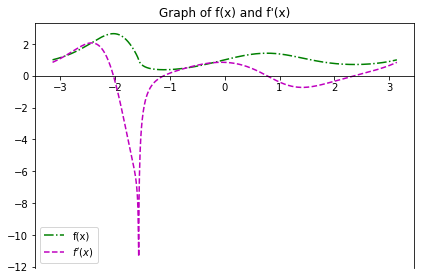

In [79]:
#question no. 1
def function_diff():
    x = sy.symbols('x')
    f_x= (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_prime = sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)), x)
    f_prime1 = lambdify(x, f_prime, 'numpy')
    f_x1 = lambdify(x, f_x, 'numpy')
    return f_x1, f_prime1
#lambdify makes the function to exist somethinh like globally.
#taking the values between -pi to pi for x variable
x = np.linspace(-np.pi, np.pi, 1000)
f_x , f_prime1 = function_diff()
fx =f_x(x)
fprime =f_prime1(x)
plt.plot(x, fx, 'g-.', label= "f(x)")
plt.plot(x, fprime, 'm--',  label = '$f^\prime(x)$')
ax = plt.gca() #it wraps around the current most graph
ax.spines['bottom'].set_position('zero') #shifts the postiton of graph to zero
plt.title("Graph of f(x) and f'(x)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\shekh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


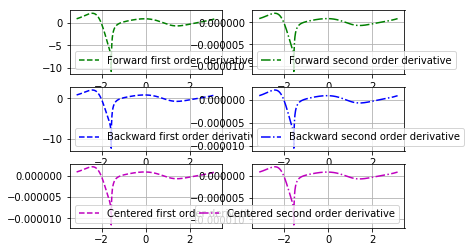

In [84]:
#question no. 2
def finite_diff(x, h):
    forward_1 = (f(x+h)- f(x))/h
    forward_2 = (-3*f(x)+4*f(x+h)-f(x+2*h))/2*h
    backward_1 = (f(x)-f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+f(x-2*h))/2*h
    centered_1 = (f(x+h)-f(x-h))/2*h
    centered_2 = (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/12*h
    return forward_1, forward_2, backward_1, backward_2, centered_1, centered_2

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f
x = np.linspace(-np.pi, np.pi, 1000)
forward_1, forward_2, backward_1, backward_2, centered_1, centered_2 = finite_diff(x, 1e-3)

#plt.xlimit(-5,5)
#plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.plot(x, forward_1,'g--', label ='Forward first order derivative') 
plt.grid('True')
plt.legend()
#plt.show() if we put this the graphs come after another.

plt.subplot(3,2,2)
plt.plot(x, forward_2, 'g-.', label = "Forward second order derivative")
plt.grid('True')
plt.legend()
#plt.show()

plt.subplot(3,2,3)
plt.plot(x, backward_1, 'b--',label = "Backward first order derivative")
plt.grid('True')
plt.legend()
#plt.show()

plt.subplot(3,2,4)
plt.plot(x, backward_2, 'b-.',label = "Backward second order derivative")
plt.grid('True')
plt.legend()
#plt.show()

plt.subplot(3,2,5)
plt.plot(x, centered_1, 'm--',label = "Centered first order derivative")
plt.legend(loc = 0)
plt.grid('True')
#plt.show()

plt.subplot(3,2,6)
plt.plot(x, centered_2, 'm-.',label = "Centered second order derivative")
plt.grid('True')
plt.legend(loc = 4)
plt.show()


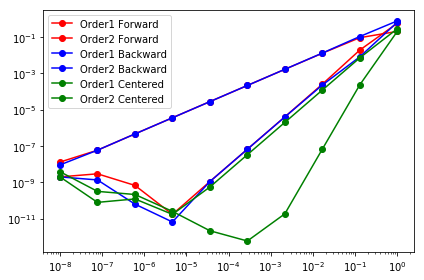

In [143]:
#question No. 3
# here I have modified the function of first question 
#to get exact derivative.
x = 1.0
def point_diff(x):
    f_x= (sy.sin(x)+1)**sy.sin(sy.cos(x))
    fprime =f_prime1(x)
    return fprime

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

def finite_diff(x, h):
    forward_1 = (f(x+h)- f(x))/h
    forward_2 = (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
    backward_1 = (f(x)-f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
    centered_1 = (f(x+h)-f(x-h))/(2*h)
    centered_2 = (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
    return forward_1, forward_2, backward_1, backward_2, centered_1, centered_2


h = np.logspace(-8,0,10) 
forward_1, forward_2, backward_1, backward_2, centered_1, centered_2 = finite_diff(x, h)
error1 = point_diff(x)- forward_1 #shall we put curly braces around them to store
#it as a list or tuple for all values of h?
error2 = point_diff(x)- forward_2
error3 = point_diff(x)- backward_1
error4 = point_diff(x)- backward_2
error5 = point_diff(x)- centered_1
error6 = point_diff(x)- centered_2
plt.loglog(h, abs(error1), 'r-o', label ='Order1 Forward' )
plt.loglog(h, abs(error2), 'r-o', label ='Order2 Forward' )
plt.loglog(h, abs(error3), 'b-o', label ='Order1 Backward' )
plt.loglog(h, abs(error4), 'b-o', label ='Order2 Backward' )
plt.loglog(h, abs(error5), 'g-o', label ='Order1 Centered' )
plt.loglog(h, abs(error6), 'g-o', label ='Order2 Centered' )
plt.tight_layout()
#plt.label("Plot of finite difference against error in measurement")
plt.legend()
plt.show()
# fx =f_x(np.pi)
# fprime =f_prime1(np.pi)
# fx, fprime

In [224]:
# Question no. 4
plane = np.load('plane.npy')
plane
a = 500
h = 1
alpha_rad = np.deg2rad(plane[:,1])
beta_rad = np.deg2rad(plane[:,2])
x = a*((np.tan(beta_rad))/((np.tan(beat_rad)-np.tan(alpha_rad))))
y = a*((np.tan(beta_rad)*np.tan(alpha_rad))/((np.tan(beat_rad)-np.tan(alpha_rad))))

def forward_1(t=0,h=1):
    forward_x = (x[t+h]- x[t])/h
    forward_y = (y[t+h]- y[t])/h
    return forward_x, forward_y

def backward_1(t=7, h=1):
    backward_x = (x[t]-x[t-h])/h
    backward_y = (y[t]-y[t-h])/h
    return backward_x, backward_y

def centered_1(t,h=1):
    centered_x = np.zeros(t-1)
    centered_y = np.zeros(t-1)
    for i in range (1,t):
        centered_x[i-1] = (x[i+h]-x[i-h])/(2*h)
        centered_y[i-1] = (y[i+h]-y[i-h])/(2*h)
    return centered_x, centered_y
b= (forward_1()[0]**2+ forward_1()[1]**2)**(1/2)
a = (centered_1(7)[0]**2+centered_1(7)[1]**2)**(1/2)
c = (backward_1()[0]**2+ backward_1()[1]**2)**(1/2)



print('the speed at different time points is : ', np.append(np.append(b,a),c))
# there should be a simpler way of doing this. I really need to know i am not thinking like a programmer here?

the speed at different time points is :  [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


In [3]:
#question no.5
def jacobian(func,x_0,h):
    m =  func(x_0).shape[0]
    n= len(x_0)
    basis =  np.eye(n)
    jac = np.zeros((m,n))
    for j in range(n):
        jac[:,j] = (2*h)**-1*(func(x_0+ h*basis[:,j])-func(x_0- h*basis[:,j]))
    return jac

f = lambda x:np.array([x[0]**2,x[0]**3- x[1]])
jacobian(f,np.array([5,2]),.00001)

array([[10.,  0.],
       [75., -1.]])

C:\Users\shekh\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


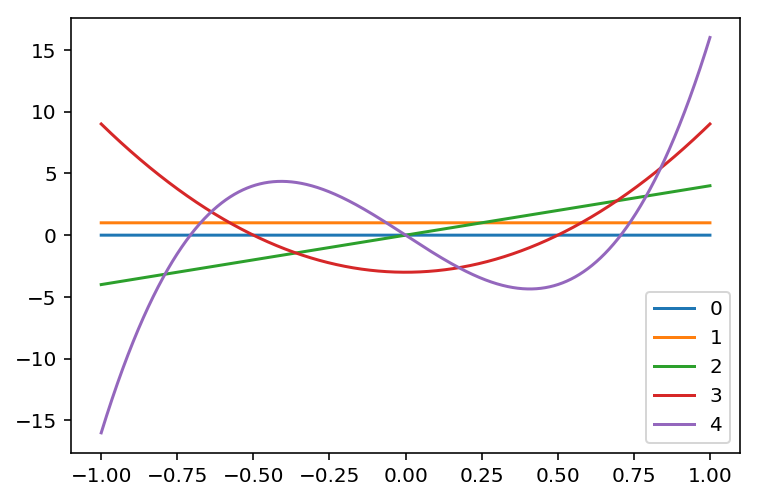

In [7]:
#question no.6
def cheby(x,n):
    if n ==0:
        return  anp.ones_like(x)
    elif n==1:
        return x
    else:
        return 2*x*cheby(x,n-1)- cheby(x,n-2)
        

# cheby(np.array([1,2,3]),4)
dcheby = elementwise_grad(cheby)
x = anp.linspace(-1,1,10000)
n =5
sdcheby = anp.zeros((n,len(x)))
for k in anp.arange(0,n):
    sdcheby[k,:] =  dcheby(x,k)
    %config InlineBackend.figure_format = 'retina'
    plt.plot(x, sdcheby[k,:], label = k)
    plt.legend()    

Text(0.5,0,'Computation Time (Secs)')

Text(0,0.5,'Absolute Error')

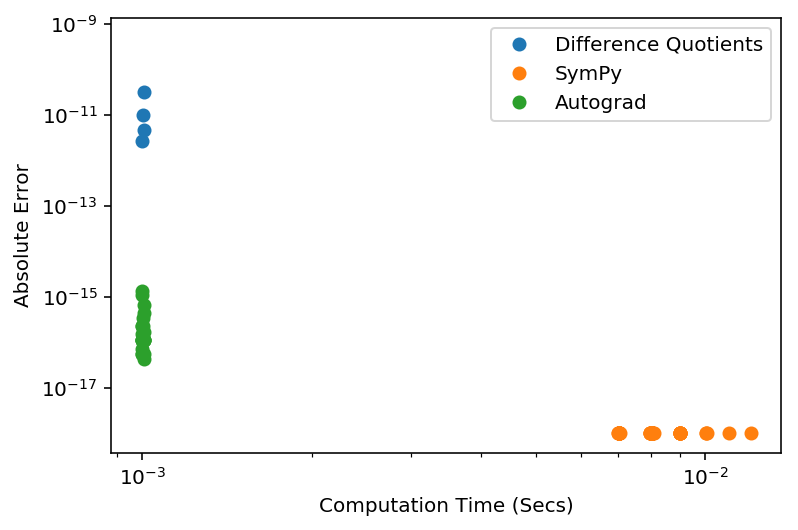

In [10]:
#question no. 7
def prob7(N):
    #Exact Derivative
    exact = np.zeros(N)
    x = np.zeros(N)
    exact_comptime = np.zeros(N)
    for i in range(N):
        x[i] = np.random.uniform(-10,10)
    for i in range(N):
        start_exact = time.time()
        fx, f_primex1 = exact_diff()
        exact[i] = f_primex1(x[i])
        end_exact = time.time()
        exact_comptime[i] = end_exact - start_exact
    #Approx Derviative
    approx_comptime = np.zeros(N)
    approx = np.zeros(N)
    for i in range(N):
        start_approx= time.time()
        approx[i] = approx_deriv(x[i], 1e-5)
        end_approx = time.time()
        approx_comptime[i] = end_approx- start_approx
    absolute_error = np.abs(approx-exact)
    #Autograd Derivative
    auto_comptime= np.zeros(N)
    auto = np.zeros(N)
    for i in range(N):
        start_auto = time.time()
        g = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
        dg = grad(g)
        auto[i] = dg(x[i])
        end_auto = time.time()
        auto_comptime[i] = end_auto - start_auto
    auto_error= np.abs(auto - exact)
    return absolute_error, auto_error, exact_comptime, approx_comptime, auto_comptime

def exact_diff():
    x = sy.symbols('x')
    fx = (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_primex = sy.diff(fx, x)
    f_primex1 = sy.lambdify(x, f_primex, "numpy")
    fx = sy.lambdify(x, fx, "numpy")
    return fx, f_primex1

def approx_deriv(x, h):
    centred_4 = (f(x-2*h) - 8*f(x-h)+8*f(x+h) - f(x+2*h))/(12*h)
    return centred_4

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

absolute_error, auto_error, exact_comptime, approx_comptime, auto_comptime= prob7(200)
exact_error = np.ones(200)*(1e-18)
plt.plot(approx_comptime, absolute_error, 'o', label = 'Difference Quotients')
plt.plot(exact_comptime, exact_error, 'o', label = 'SymPy')
plt.plot(auto_comptime,auto_error, 'o', label = 'Autograd')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Computation Time (Secs)')
plt.ylabel('Absolute Error')
plt.show()


### Integration 

In [11]:
def prob1(a,b,N,method):
    if method=='midpoint':
        x = np.zeros(N)
        for i in range(N):
            x[i] = a+((2*i+1)*(b-a)/(2*N))
        integral = ((b-a)/N)*np.sum(g(x))
    elif method =='trapezoid':
        x = np.zeros(N+1)
        for i in range(N+1):
            x[i] = a + (i*(b-a)/N)
        integral = ((b-a)/(2*N))*(g(x)[0] + 2*np.sum(g(x)[1:-1]) + g(x)[-1])
    elif method == 'simpsons':
        x = np.zeros((2*N)+1)
        for i in range((2*N)+1):
            x[i] = a+i*((b-a)/(2*N))
        x_odd = x[1::2]
        x_even = x[2::2][:-1]
        integral = (1/2)*((b-a)/(3*(N+1)))*((g(x)[0])+ 4*np.sum(g(x_odd))+2*np.sum(g(x_even))+g(x)[-1])
    return integral

def g(x):
    func = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return func

midpoint = prob1(-10,10, 10000, 'midpoint')
trapezoid = prob1(-10,10, 10000, 'trapezoid')
simpsons = prob1(-10,10, 10000, 'simpsons') 
print('Midpoint error is: ', np.abs(4373.33333 - midpoint))
print('Trapezoid error is: ', np.abs(4373.33333 - trapezoid))
print('Simposons error is: ', np.abs(4373.33333 - simpsons))

Midpoint error is:  0.0001335333327006083
Trapezoid error is:  0.00027706666514859535
Simposons error is:  0.4372862710397385


Text(0.5,0,'Z')

Text(0,0.5,'Omega')

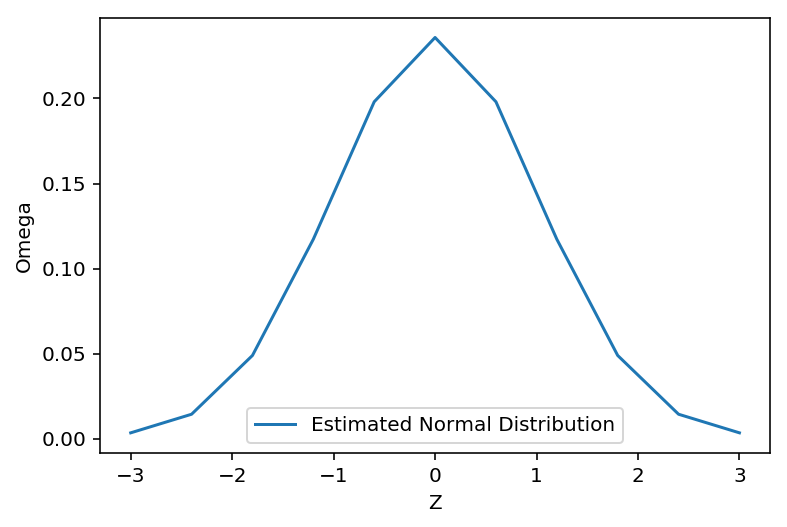

In [14]:
def prob2(mu, sigma, N, k):
    Z = np.linspace(mu-sigma*k, mu+sigma*k, N)
    w = np.zeros(N)
    w[0] = stats.norm.cdf(((Z[0]+Z[1])/2), loc= mu, scale = sigma)
    w[N-1] = 1- stats.norm.cdf(((Z[N-1]+Z[N-2])/2), loc= mu, scale= sigma)
    for i in range(1,N-1):
        w[i] = stats.norm.cdf(((Z[i]+Z[i+1])/2),loc=mu, scale= sigma) - stats.norm.cdf(((Z[i]+Z[i-1])/2),loc=mu, scale= sigma)
    return w,Z

omega, Z = prob2(0,1,11,3)
plt.plot(Z, omega, label='Estimated Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Omega')
plt.legend()
plt.show()

Text(0.5,0,'A')

Text(0,0.5,'Omega')

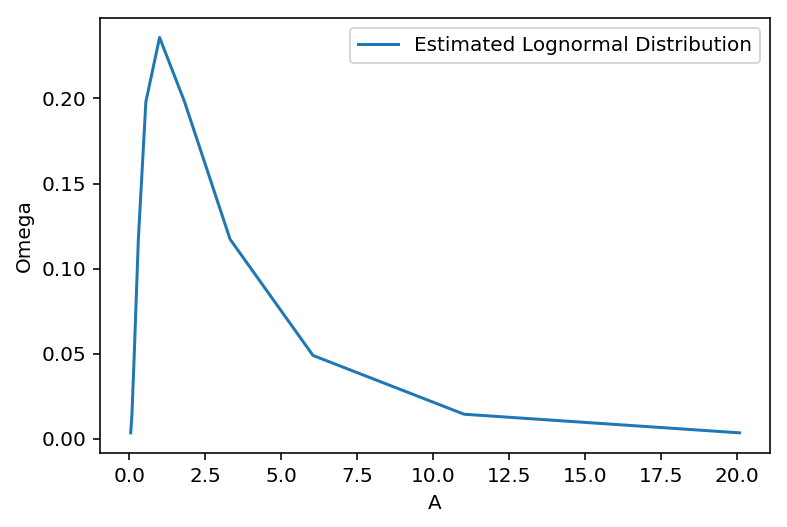

In [15]:
omega, Z = prob2(0,1,11,3)
A = np.exp(Z)
plt.plot(A, omega, label='Estimated Lognormal Distribution')
plt.xlabel('A')
plt.ylabel('Omega')
plt.legend()
plt.show()

In [16]:
omega,Z = prob2(10.5, 0.8, 10000,10)
Y = np.exp(Z)
estimated_mean=np.sum(omega*Y)
actual_mean = np.exp(10.5+(1/2)*0.8**2)
error = np.abs(estimated_mean- actual_mean)
print('The error between estimated mean and actual mean is: ', error)

The error between estimated mean and actual mean is:  0.005335583038686309


In [17]:
def g(x):
    func = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return func

def criterion_func(params, *args):
    w_1, w_2, w_3, x_1, x_2, x_3 = params
    a,b = args
    error_1= (w_1+w_2+w_3 - (b-a))
    error_2 = (w_1*x_1 + w_2*x_2+w_3*x_3 - (1/2)*(b**2 - a**2))
    error_3 = (w_1*x_1**2 + w_2*x_2**2 + w_3*x_3**2 - (1/3)*(b**3-a**3))
    error_4 = (w_1*x_1**3 + w_2*x_2**3 + w_3*x_3**3 - (1/4)*(b**4 - a**4))
    error_5 = (w_1*x_1**4 + w_2*x_2**4 + w_3*x_3**4 - (1/5)*(b**5-a**5))
    error_6 = (w_1*x_1**5 + w_2*x_2**5 + w_3*x_3**5- (1/6)*(b**6- a**6))
    error_vec = np.array([error_1, error_2, error_3, error_4, error_5, error_6])
    return error_vec

w_1_init = 0.5
w_2_init = 1
w_3_init = 0.5
x_1_init = 1
x_2_init = 1 
x_3_init = 1
params_init = np.array([w_1_init, w_2_init, w_3_init, x_1_init, x_2_init, x_3_init])
opt_args = -10,10
results = opt.root(criterion_func, params_init, args= (opt_args), tol = 1e-10)
p = results.x
omega = p[:3]
x = p[3:]
function_val = g(x)
print('The value of the integral by Gaussian Quadrature is: ',np.sum(omega*function_val))

The value of the integral by Gaussian Quadrature is:  4373.333333332432


In [18]:
def g(x):
    func = 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
    return func
    
print('The error between the exact value of the integral and scipy is: ', 
      intgr.quad(g, -10,10)[0] - 4373.33333333333)

The error between the exact value of the integral and scipy is:  3.637978807091713e-12


In [19]:
def monte(dom_low, dom_high, N):
    area = (np.abs(dom_high-dom_low))**2
    draws = np.random.uniform(low=dom_low, high= dom_high, size=(N,2))
    values= np.empty(N)
    for i in range(N):
        values[i] = g(draws[i,0], draws[i,1])
    monte = area*(1/N)*np.sum(values)
    return monte
    
def g(x,y):
    if x**2+y**2 <=1:
        func = 1
    else:
        func=0
    return func

monte(-1,1,1000000)
        

3.141024

Text(0.5,1,'Weyl')

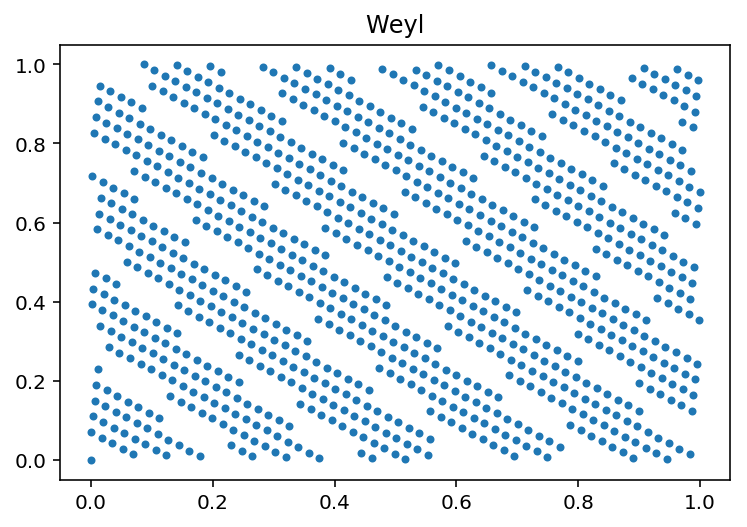

Text(0.5,1,'Haber')

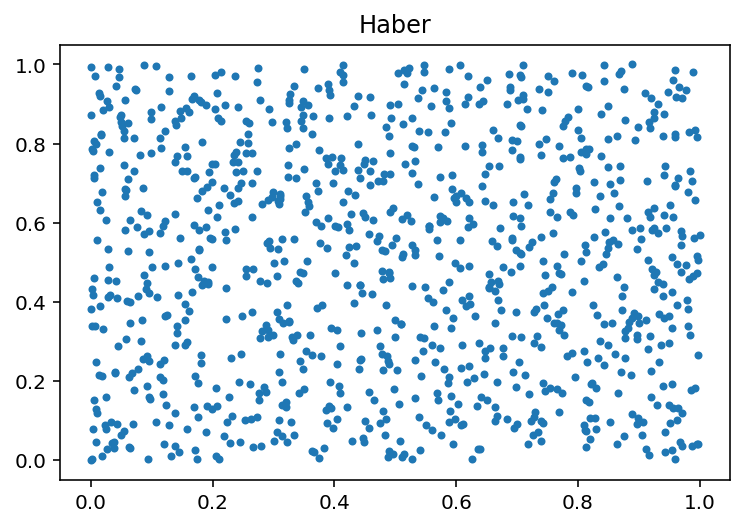

Text(0.5,1,'Neider')

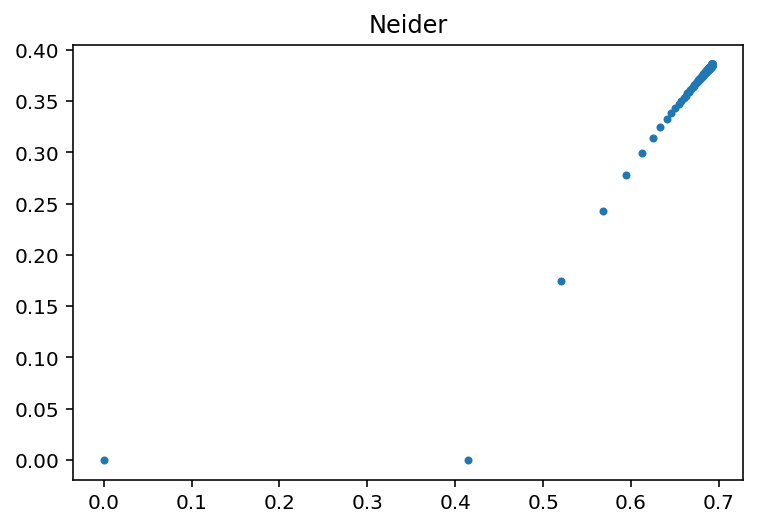

In [21]:
def equidist(N,d):
    primes = np.empty(0)
    for i in range(1,d+1):
        primes = np.append(primes, sy.prime(i))
    #primes contains the first d primes
    weyl_mat = np.zeros((d,N))
    haber_mat = np.zeros((d,N))
    neider_mat = np.zeros((d,N))
    
    for i, value in enumerate(primes):
        for j in range(N):
            weyl_mat[i,j] = math.modf(j*(value)**(1/2))[0]
            haber_mat[i,j] = math.modf(((j*(j+1))/2)*(value)**(1/2))[0]
            neider_mat[i,j] = math.modf(j*2**((i+1)/(j+1)))[0]
    return weyl_mat, haber_mat, neider_mat
        
W,H,N = equidist(1000,2)
plt.plot(W[0,:], W[1,:],'.')
plt.title('Weyl')
plt.show()
plt.plot(H[0,:], H[1,:],'.')
plt.title('Haber')
plt.show()
plt.plot(N[0,:], N[1,:],'.')
plt.title('Neider')
plt.show()


In [23]:
def equidist(N,d):
    primes = np.empty(0)
    for i in range(1,d+1):
        primes = np.append(primes, sy.prime(i))
    #primes contains the first d primes
    weyl_mat = np.zeros((d,N))
    haber_mat = np.zeros((d,N))
    neider_mat = np.zeros((d,N))
    
    for i, value in enumerate(primes):
        for j in range(N):
            weyl_mat[i,j] = math.modf(j*(value)**(1/2))[0]
            haber_mat[i,j] = math.modf(((j*(j+1))/2)*(value)**(1/2))[0]
            neider_mat[i,j] = math.modf(j*2**((i+1)/(j+1)))[0]
    return weyl_mat, haber_mat, neider_mat

def g(x,y):
    if x**2+y**2 <=1:
        func = 1
    else:
        func=0
    return func

def monte(N, weyl_mat, haber_mat):
    area = 4
    values_weyl= np.empty(N)
    values_haber= np.empty(N)
    for i in range(N):
        values_weyl[i] = g(weyl_mat[0,i], weyl_mat[1,i])
        values_haber[i] = g(haber_mat[0,i], haber_mat[1,i])
    monte_weyl = area*(1/N)*np.sum(values_weyl)
    monte_haber = area*(1/N)*np.sum(values_haber)
    return monte_weyl, monte_haber


N = 10000
weyl_mat, haber_mat, neider_mat = equidist(N,2)
#Rescaling
weyl_mat = weyl_mat*2 - 1
haber_mat = haber_mat*2 - 1 
neider_mat = neider_mat*2 - 1

monte_weyl, monte_haber = monte(N, weyl_mat, haber_mat)
print('Estimation of pi using Weyl Method: ', monte_weyl)
print('Estimation of pi using Haber Method: ', monte_haber)
print('Rate of Convergence of Quasi Monte Carlo: ', (np.log(N)**2)/N)
print('Rate of Convergence of Monte Carlo: ', 1/((N)**(1/2)))


Estimation of pi using Weyl Method:  3.1416
Estimation of pi using Haber Method:  3.1456
Rate of Convergence of Quasi Monte Carlo:  0.008483036976765439
Rate of Convergence of Monte Carlo:  0.01


### Simplex

In [24]:

class simplex_algo:
    def __init__(self, c, A, b):
        self.c = c
        self.A = A
        self.b = b
        self.n = len(c)
        if np.any(self.A@np.zeros((self.n, 1))>self.b):
            raise ValueError('Not feasible')
    
        self.m,self.n = self.A.shape
        ind =  np.concatenate((np.arange(self.n,self.n+self.m),np.arange(self.n)))
        self.index =  ind
        self.T = self.x_tableau()
        self.basic = self.index[:self.m]
        self.nonbasic = self.index[self.m:]
        
    def x_tableau(self):
        A_bar = np.hstack((self.A,np.identity(self.m)))
        c_bar =  -1*np.hstack((self.c,np.zeros(self.m)))
        T_1 =  np.hstack((np.zeros(1),c_bar,np.ones(1)))
        T_2 = np.column_stack((self.b,A_bar,np.zeros((self.m,1))))
        T = np.vstack((T_1,T_2))
        return T
    
    def pivot(self):
        x =  self.T[0,:]
        col = np.argmin(np.where(x<0))+1
        if np.all(self.T[1:,col])<0:
            raise ValueError('Problem is unbounded')
        row = np.argmin(self.T[1:,0]/self.T[1:,col])+1
        return row,col
    
    def pivot_oper(self):
        row,col = self.pivot()
        ind = self.index
        ind[row-1],ind[self.m+col-1]=ind[self.m+col-1], ind[row-1]
        self.index =  ind
        self.T[row,:] = self.T[row,:]/self.T[row,col]
        dim1, dim2  = self.T.shape
        for h in range(dim1):
            if h != row:
                self.T[h,:]=self.T[h,:]-self.T[h,col]*self.T[row,:]
    
    def solve_simplex(self):
        maxiter = 1000
        iterx = 0
        while np.any(self.T[0,:] < 0) and  iterx<maxiter:
            self.pivot_oper()
            iterx += 1
        return self.T
#         basic_dict = {self.basic[i]: round(self.T[i+1, 0], 2) for i in range(self.m)}
#         nonbasic_dict = {self.nonbasic[i]: 0 for i in range(self.n)}
#         return self.T[0, 0], basic_dict, nonbasic_dict

In [25]:
c_1 = np.array([3, 2])
A_1 = np.array([[1, -1], [3, 1], [4, 3]])
b_1 = np.array([2, 5, 7])
xcv1= simplex_algo(c_1, A_1, b_1)

# xcv1.index

# m= xcv1.x_tableau()
# print(xcv1.pivot())
# print("Before",xcv1.T)
# # xcv1.pivot_oper()
pprint(xcv1.solve_simplex())



array([[ 5.        ,  0.        , -1.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 0.33333333,  0.        , -1.33333333,  1.        , -0.33333333,
         0.        ,  0.        ],
       [ 1.66666667,  1.        ,  0.33333333,  0.        ,  0.33333333,
         0.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.66666667,  0.        , -1.33333333,
         1.        ,  0.        ]])


C:\Users\shekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


In [26]:
print("After", xcv1.T)

After [[ 5.          0.         -1.          0.          1.          0.
   1.        ]
 [ 0.33333333  0.         -1.33333333  1.         -0.33333333  0.
   0.        ]
 [ 1.66666667  1.          0.33333333  0.          0.33333333  0.
   0.        ]
 [ 0.33333333  0.          1.66666667  0.         -1.33333333  1.
   0.        ]]


In [27]:
#Iterative Solvers

In [28]:
def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

def jacob_solver(A,b,tol,maxiters):
    iters = 0
    error = 10
    m,n = A.shape
    inv_D =  np.diag(np.diag(A)**-1.)
    x_0 = 1e-8*np.zeros(n)
    
    while error > tol and iters < maxiters:
        x_1 = x_0 + inv_D@(b - A@x_0)
        error = linalg.norm(x_1- x_0, np.inf)
        x_0 = x_1
        iters += 1
    return x_1

A = diag_dom(3)
b = np.random.random(3)
tol = 1e-6
maxiters = 100

jacob_solver(A,b,tol,maxiters)
        

array([-0.05117184,  0.36545388,  0.78309762])

In [29]:
A = np.array([[2, 0,-1],[-1,3,2],[0,1,3]])
b = np.array([3,3,-1])
jacob_solver(A,b,tol,maxiters)

array([ 1.00000013,  1.99999974, -1.00000015])

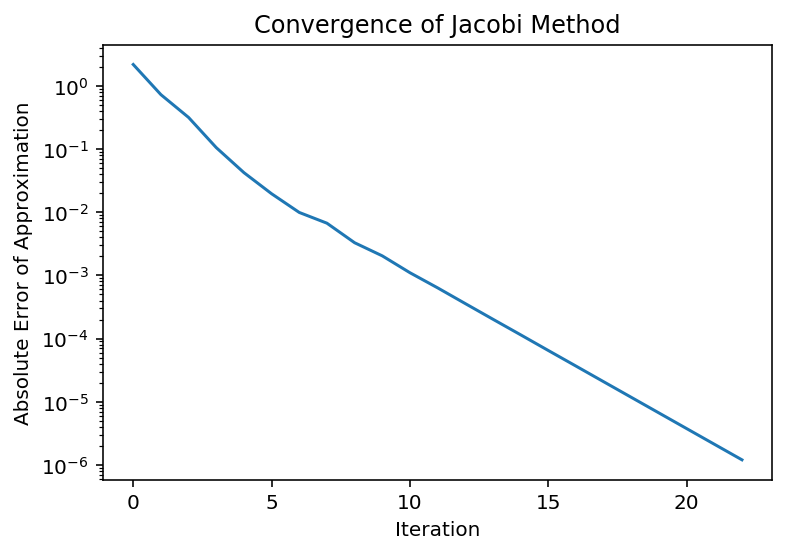

(array([ 1.00000013,  1.99999974, -1.00000015]),
 [<matplotlib.lines.Line2D at 0x2c78ea77438>])

In [30]:
def jacob_solver(A,b,tol,maxiters, plot = False):
    iters = 0
    error = 10
    m,n = A.shape
    inv_D =  np.diag(np.diag(A)**-1.)
    x_0 = 1e-8*np.zeros(n)
    iter_list = []
    ab_er = []
    while error > tol and iters < maxiters:
        x_1 = x_0 + inv_D@(b - A@x_0)
        error = linalg.norm(x_1- x_0, np.inf)
        ab_er.append(linalg.norm(A@x_1- b, np.inf))
        iter_list.append(iters)
        x_0 = x_1
        iters += 1
    if plot == True:
        ax = plt.gca()
        bp = ax.semilogy(iter_list,ab_er)
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.title("Convergence of Jacobi Method")
        plt.show()
    return x_1,bp


A = np.array([[2, 0,-1],[-1,3,2],[0,1,3]])
b = np.array([3,3,-1])
jacob_solver(A,b,tol,maxiters, plot = True)


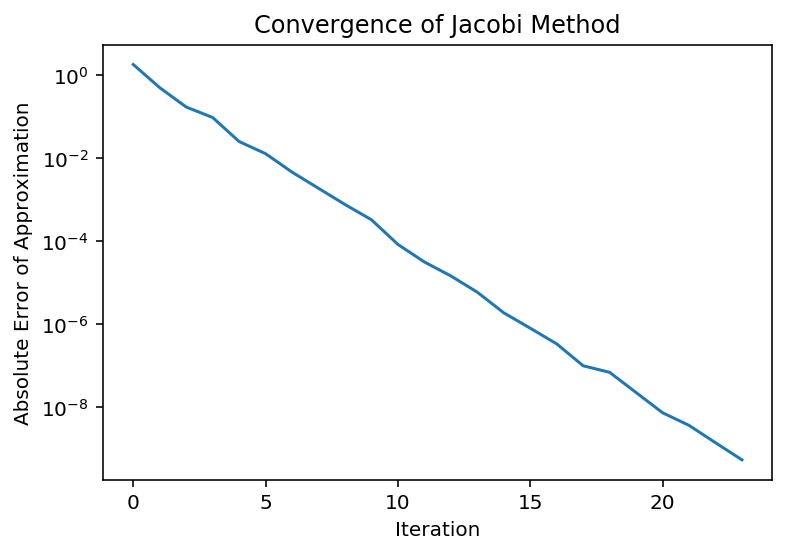

(array([ 1.04153247e-02,  1.54680038e-02,  5.80829763e-03,  1.61963552e-04,
         4.14640334e-02,  5.02520720e-02,  2.06535133e-02,  3.18635402e-02,
         4.19201317e-02,  4.30946971e-02,  3.29285092e-02,  1.06675644e-01,
         6.80504243e-02,  2.51504464e-02,  6.86954948e-02,  7.09623470e-02,
         1.15291276e-01,  3.03393395e-02,  8.25676636e-03,  3.50366899e-02,
         2.23239448e-02,  4.70860037e-02,  1.35483098e-01,  4.42491713e-02,
         3.96496871e-02,  4.59638579e-02,  3.87970793e-02,  8.02716007e-02,
         6.11215726e-02, -5.65676857e-03,  6.49815331e-02, -2.56089935e-03,
         9.29885359e-02,  6.66049738e-02, -2.71880785e-02,  1.96627086e-02,
         9.69254174e-02,  1.07400620e-02,  2.93245312e-02,  5.89066212e-02,
         8.14412959e-02,  5.79584325e-02,  4.47522657e-02,  1.17905208e-01,
        -2.41731336e-02,  6.80606829e-02,  9.11115767e-02,  6.06790294e-02,
         1.04445735e-01,  5.53630498e-02,  5.64428432e-02,  6.54121059e-02,
         1.6

In [31]:
A = diag_dom(100)
b = np.random.random(100)
tol = 1e-10
maxiters = 50

jacob_solver(A,b,tol,maxiters, plot = True)

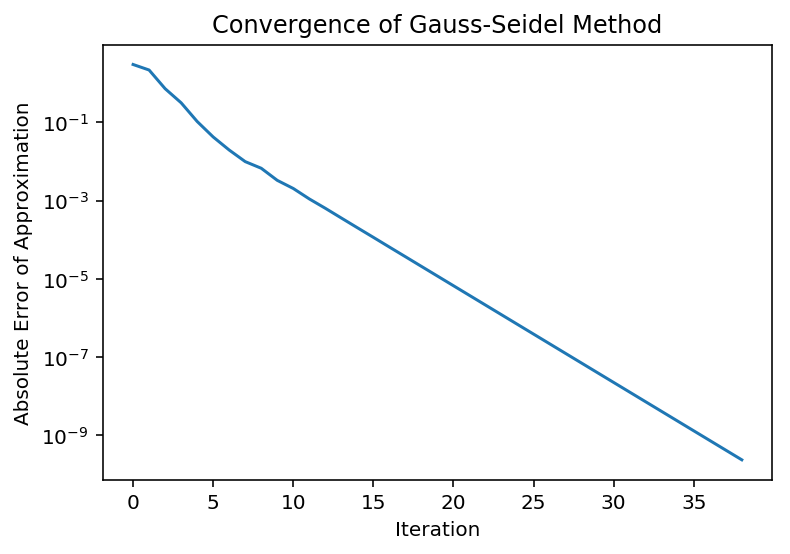

(array([ 1.,  2., -1.]), [<matplotlib.lines.Line2D at 0x2c78e6ab320>])

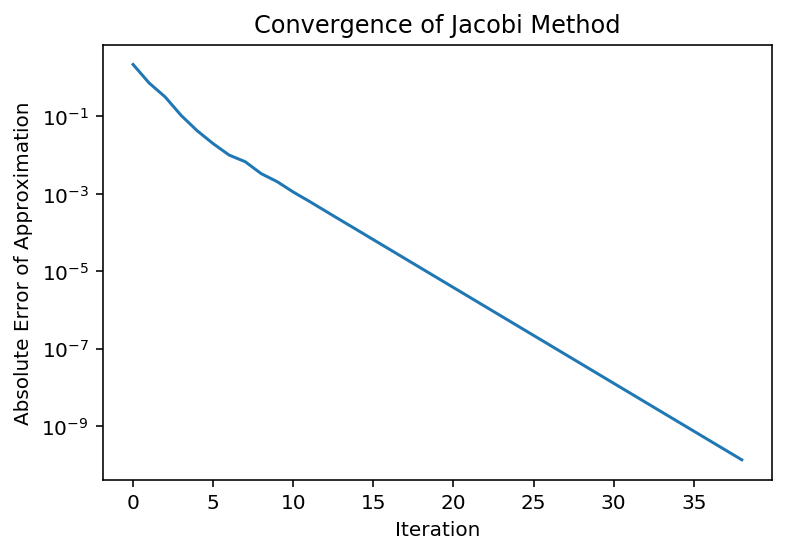

(array([ 1.,  2., -1.]), [<matplotlib.lines.Line2D at 0x2c78eb6c860>])

In [32]:
def GS_solver(A,b,tol,maxiters, plot = False):
    iters = 0
    error = 10
    m,n = A.shape
    x_0 = 1e-8*np.zeros(n)
    iter_list = []
    ab_er = []
    while error > tol and iters < maxiters:
        x_0_copy = x_0.copy()
        x_1 = np.array([x_0[i] + (1 / A[i, i]) * (b[i] - A[i] @ x_0) for i in range(len(x_0))]) 
        error = linalg.norm(x_1- x_0_copy, np.inf)
        iter_list.append(iters)
        x_0 = x_1
        ab_er.append(linalg.norm(A@x_0_copy- b, np.inf))
        iters += 1
    if plot == True:
        ax = plt.gca()
        bp = plt.semilogy(iter_list,ab_er)
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.title("Convergence of Gauss-Seidel Method")
        plt.show()
    return x_1,bp

A = np.array([[2, 0,-1],[-1,3,2],[0,1,3]])
b = np.array([3,3,-1])
GS_solver(A,b,tol,maxiters, plot = True)
jacob_solver(A,b,tol,maxiters, plot = True)

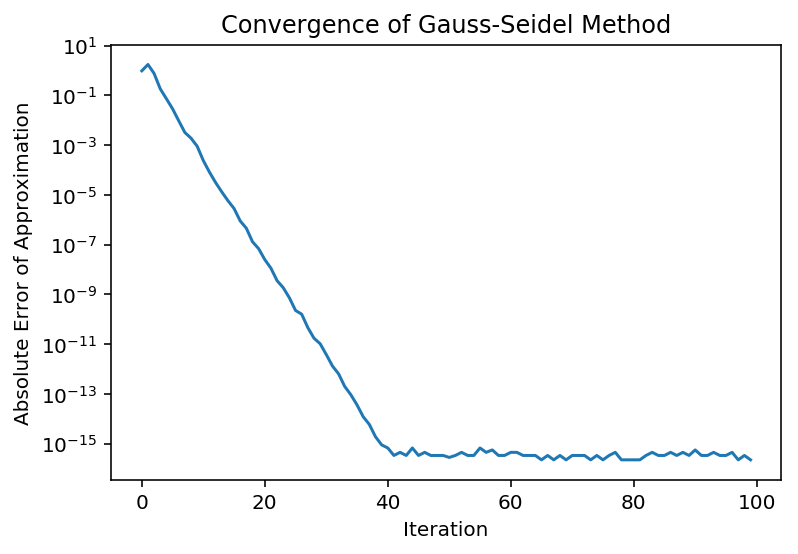

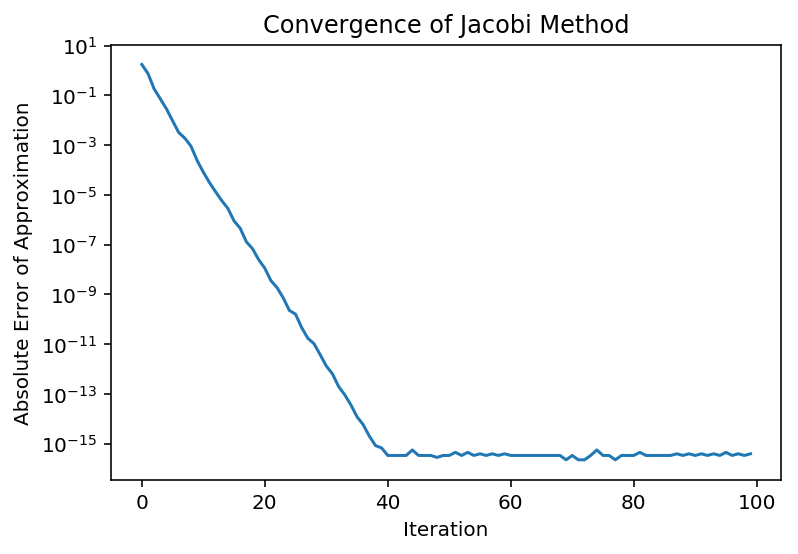

In [33]:
A = diag_dom(100)
b = np.random.random(100)
tol = 1e-200
maxiters = 100


GS_solver(A,b,tol,maxiters, plot = True)[1]
jacob_solver(A,b,tol,maxiters, plot = True)[1]

In [34]:
def GS_solver(A,b,tol,maxiters):
    iters = 0
    error = 10
    m,n = A.shape
    x_0 = np.zeros(n)
    x_1 = np.zeros_like(x_0)
    while error > tol and iters < maxiters:
        x_0_copy = x_0.copy()
        for i in range(len(x_0)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
            x_1[i] = x_0[i] + (1 / A[i, i]) * (b[i] - Aix)
        error = linalg.norm(x_1- x_0_copy, np.inf)
        x_0 = x_1
        iters += 1
    return x_1

In [35]:
from scipy import sparse
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
# print(A)
# print(b)
tol = 1e-6
maxiters = 100

x = GS_solver(A,b,tol,maxiters)
np.allclose(A @ x, b, atol=1e-5)

True

In [36]:
def SOR_solver(A, b,ω, tol=1e-8, maxiters = 100):
    iters = 0
    error = 10
    x_0 = np.zeros(len(b))
    x_1 = np.zeros_like(x_0)
    while error > tol and iters < maxiters:
        x_0 = x_0.copy()
        for i in range(len(x_0)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_0[A.indices[rowstart:rowend]]
            x_1[i] = x_0[i] + (ω/A[i,i])*(b[i] - Aix)
        dist = np.linalg.norm(x_1 - x_0)
        x_0 = x_1
        iters += 1
    return x_0, iters

In [39]:
from scipy import sparse
A = diag_dom(10)
A_x = sparse.csr_matrix(A)
b = np.random.random(10)
# print(A)
# print(b)
# tol = 1e-8
# maxiters = 100
x_gs = GS_solver(A_x,b,1e-8,100)
x_SOR,iters =SOR_solver(A_x,b,1.1)
print(x_gs)
print(x_SOR)
# print(b)
#np.allclose(A @ x, b, atol=1e-5) # getting error here ...

[0.47568815 0.04339138 0.23936609 0.71295405 0.34316816 0.27684773
 0.59665415 0.07527005 0.01899848 0.01255171]
[0.47568815 0.04339138 0.23936609 0.71295405 0.34316816 0.27684773
 0.59665415 0.07527005 0.01899847 0.01255171]


In [40]:
#Cannot do other problems of this chapter

### Newton Method

In [42]:
def simple_newton1(f,x_0,df,maxiter =15,tol =1e-5):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - f(x_0)/df(x_0)
        error = np.abs(x_1-x_0)
        x_0 = x_1
        iter_1 += 1
    return x_1,error<= tol,iter_1

g1  = lambda x: x**4-3
dg1 =  lambda x: 4*x**3

g2  = lambda x: np.exp(x)-2
dg2 =  lambda x: np.exp(x)

simple_newton1(g1,3,dg1,20,1e-6)
simple_newton1(g2,3,dg2,20,1e-6)

(1.3160740129525732, True, 7)

(0.6931471805599454, True, 7)

In [43]:
def solve_bank(N1,N2,P1,P2):
    maxiter =100
    tol = 1e-7
    iter_1 =0
    error =10
    r_0 = 0.1
    while error >tol and iter_1<maxiter:
        r_1 = r_0 - g(N1,N2,P1,P2,r_0)/dg(N1,N2,P1,P2,r_0,1e-6)
        error = np.abs(r_1-r_0)
        r_0 = r_1
        iter_1 += 1
    return r_1

g  = lambda n1,n2,p1,p2,r: p1*((1+r)**n1-1)-p2*(1-(1+r)**-n2)
dg = lambda n1,n2,p1,p2,r,h:(g(n1,n2,p1,p2,r+h)-g(n1,n2,p1,p2,r))/h

solve_bank(30,20,2000,8000)


0.03877843202968209

In [44]:
def simple_newton2(f,x_0,df,maxiter,tol,α):
    iter_1 =0
    error =10
    while error >tol and iter_1<maxiter:
        x_1 = x_0 - α*f(x_0)/df(x_0)
        error = np.abs(x_1-x_0)
        x_0 = x_1
        iter_1 += 1
    return np.array([x_1,error<= tol,iter_1])

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
df = lambda x: 1./3 * np.power(np.abs(x), -2/3)

simple_newton2(f,.01,df,20,1e-5,1.0)
simple_newton2(f,.01,df,20,1e-5,0.4)  

array([10485.76,     0.  ,    20.  ])

array([6.4e-07, 1.0e+00, 6.0e+00])

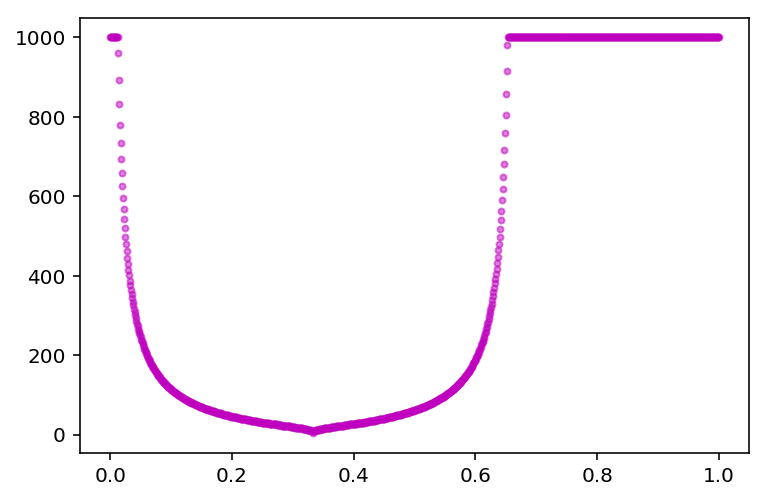

In [45]:
def opt_alpha(f,x_0,df,maxiter,tol):
    α = np.linspace(1e-5,1.000001,1000)
    iter_stop = np.zeros(len(α))
    for i in range(len(α)):
        iter_stop[i] = simple_newton2(f,x_0,df,maxiter,tol,α[i])[2]
    plt.plot(α,iter_stop,'m.', alpha =0.5)
    
opt_alpha(f,.01,df,1000,1e-20)

In [46]:
g1  = lambda x: np.array([x[0]**4 +x[1]**3 -3,x[0]**3 +x[1]**4 -3])
g2 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
g3  = lambda x: x**4-3
# dg1 = lambda x: 1./3 * np.power(np.abs(x), -2/3)



def jacobian(func,x_vec):
    h = .0001
    m =  func(x_vec).shape[0]
    n= len(x_vec)
    basis =  np.eye(n)
    jac = np.zeros((m,n))
    for j in range(n):
        jac[:,j] = (2*h)**-1*(func(x_vec+ h*basis[:,j])-func(x_vec- h*basis[:,j]))
    return jac

jacobian(g1,np.array([1,2]))

def simple_newton4(f,x_vec,maxiter,tol,α):
    iter_1 =0
    error =10
    if np.isscalar(f):
        return simple_newton2(f,x_vec,jacobian(f,x_vec),maxiter,tol,α)
    else:
        while error >tol and iter_1<maxiter:
            x_1 = x_vec - α*linalg.solve(jacobian(f,x_vec), f(x_vec))
            error = linalg.norm(x_1-x_vec,2)
            x_vec = x_1
            iter_1 += 1
    return x_1,error<= tol,iter_1

simple_newton4(g3,np.array([1]),200,1e-6,.5)

array([[ 4.00000004, 12.00000001],
       [ 3.00000001, 32.00000008]])

(array([1.31607315]), True, 17)

In [47]:
f = lambda x: anp.array([5*x[0]*x[1] - x[0]*(1 + x[1]), -x[0]*x[1] + (1 - x[1])*(1 + x[1])])
Df = jacobian(f,np.array([1,1]))

def find_init(f, Df, niter=100):
    # Create search domain
    x_domain = np.linspace(-0.25, 0, 100)
    y_domain = np.linspace(0, 0.25, 100)
    X, Y = np.meshgrid(x_domain, y_domain)
    xy_domain = zip(X.ravel(), Y.ravel())
    
    # See where each point in the domain converges
    for coord in xy_domain:
        try:
            min1 = simple_newton4(anp.array(coord), f, Df, alpha=1, maxiter=niter)
            min2 = simple_newton4(anp.array(coord), f, Df, alpha=0.55, maxiter=niter)
            if (np.allclose(min1, anp.array((0, 1))) or np.allclose(min1, anp.array((0, -1)))) and np.allclose(min2, anp.array((3.75, 0.25))):
                return coord
        except:
            pass

print(find_init(f, Df))

None
